# Diabities Prediction System Using Machine Learning

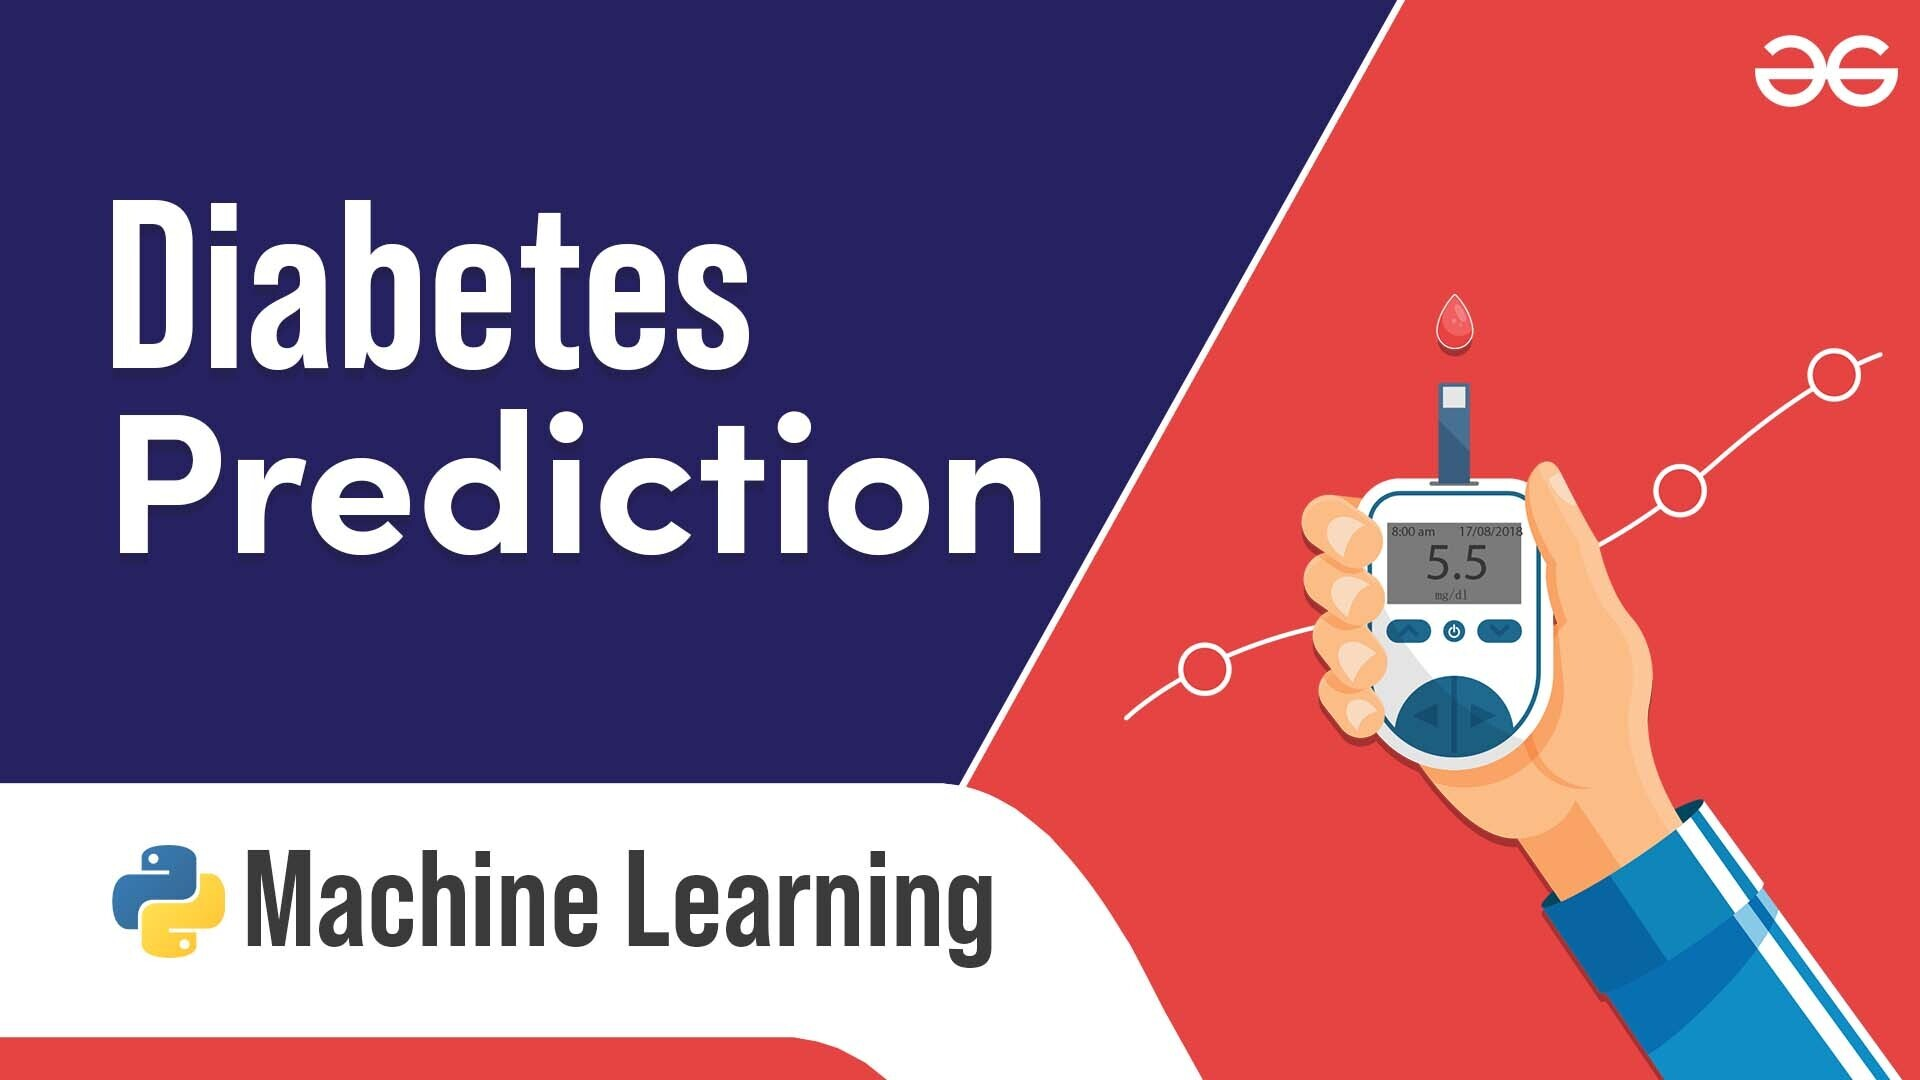

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

#Stastics
from scipy import stats as st
import pylab

# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier 
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix , r2_score

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Data Visualization

In [10]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


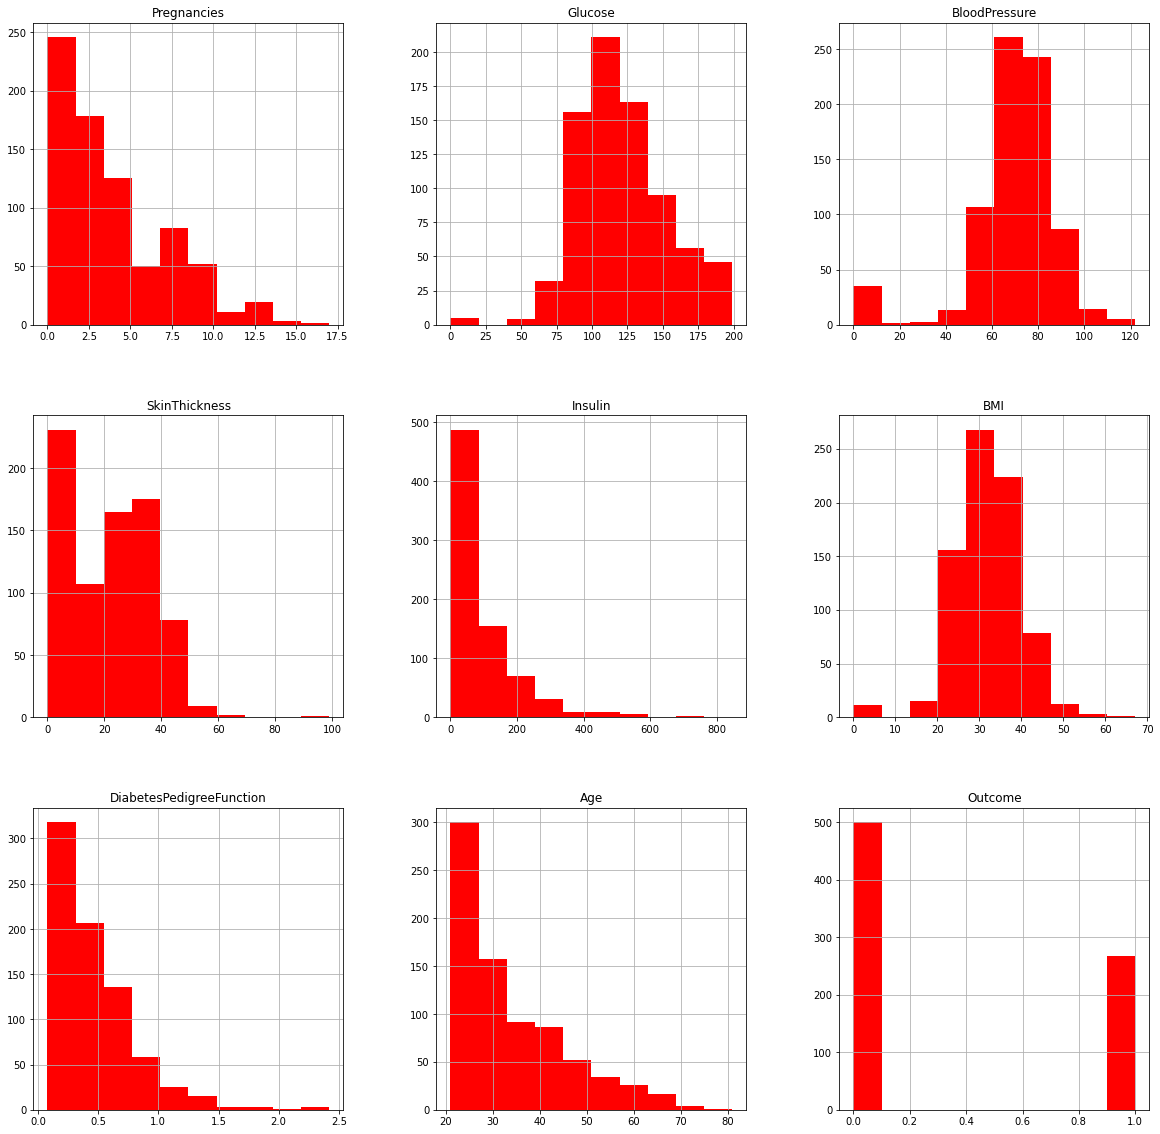

In [13]:
p = df.hist(figsize = (20,20),color='red')

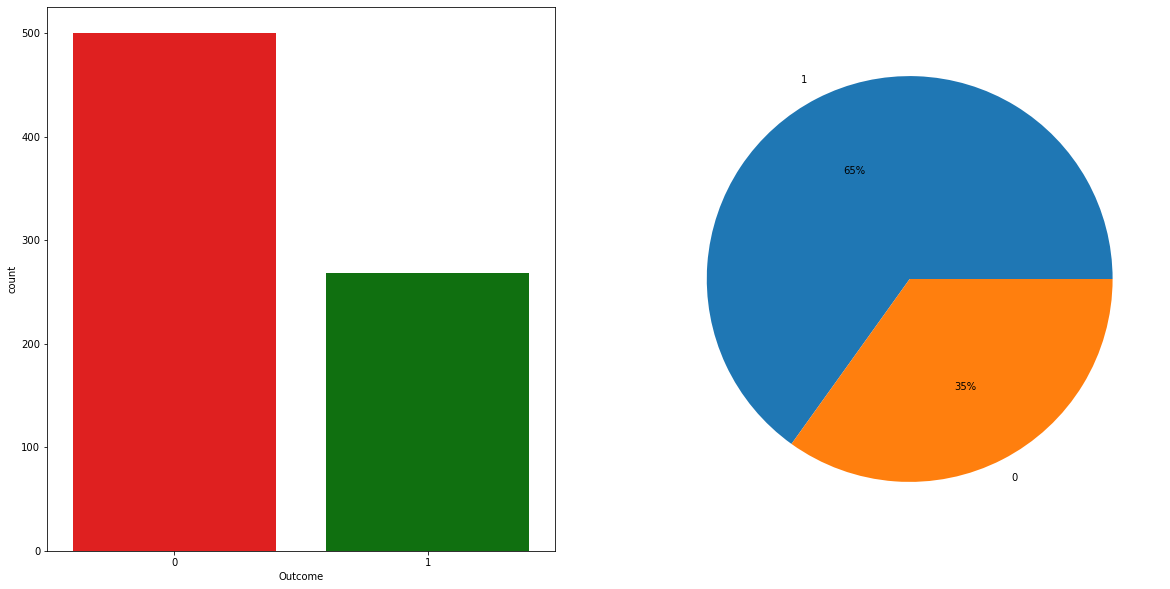

In [121]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(df['Outcome'],palette=['red','green'],data=df);

plt.subplot(1,2,2)
plt.pie(df['Outcome'].value_counts(),labels=df['Outcome'].unique(),autopct='%0.0f%%',data=df)
plt.show()

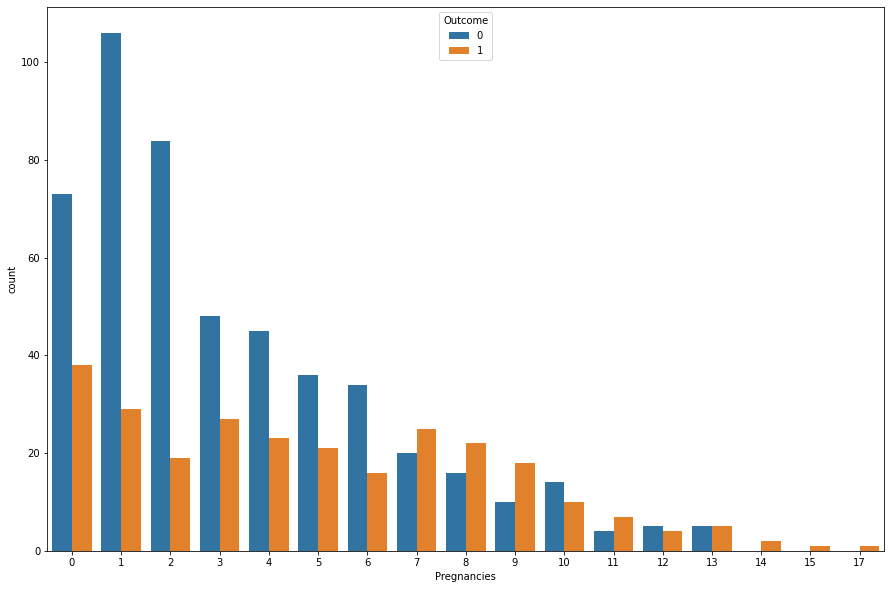

In [123]:
plt.figure(figsize=(15,10))
sns.countplot(df['Pregnancies'],hue='Outcome',data=df);

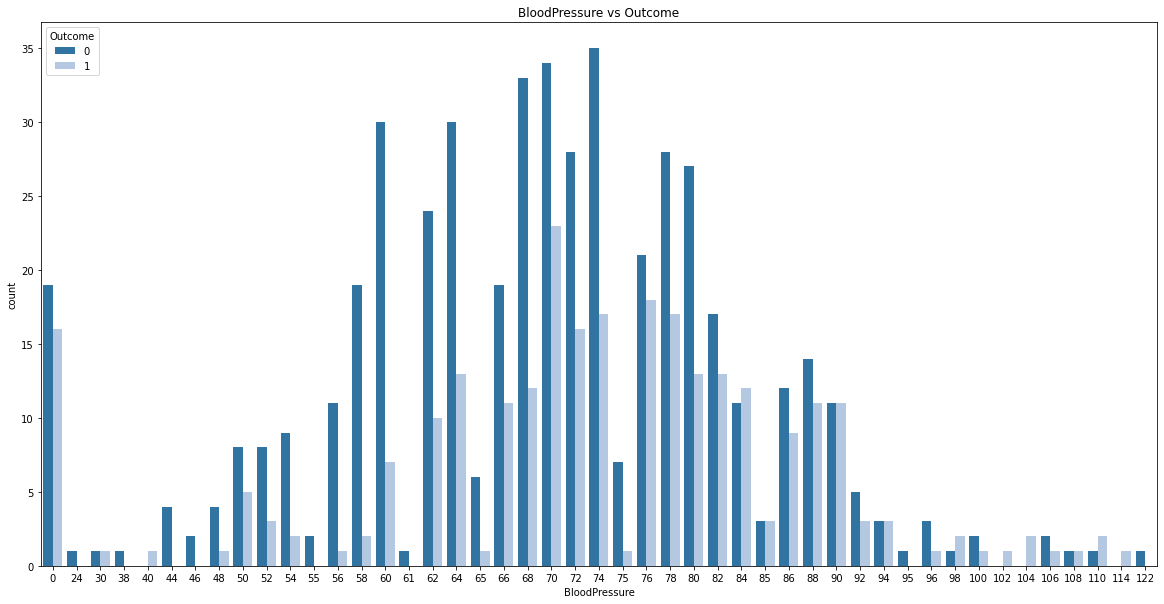

In [126]:
plt.figure(figsize=(20,10))
plt.title("BloodPressure vs Outcome")
sns.countplot(x='BloodPressure',hue='Outcome',palette="tab20",data=df)
plt.show()

In [15]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


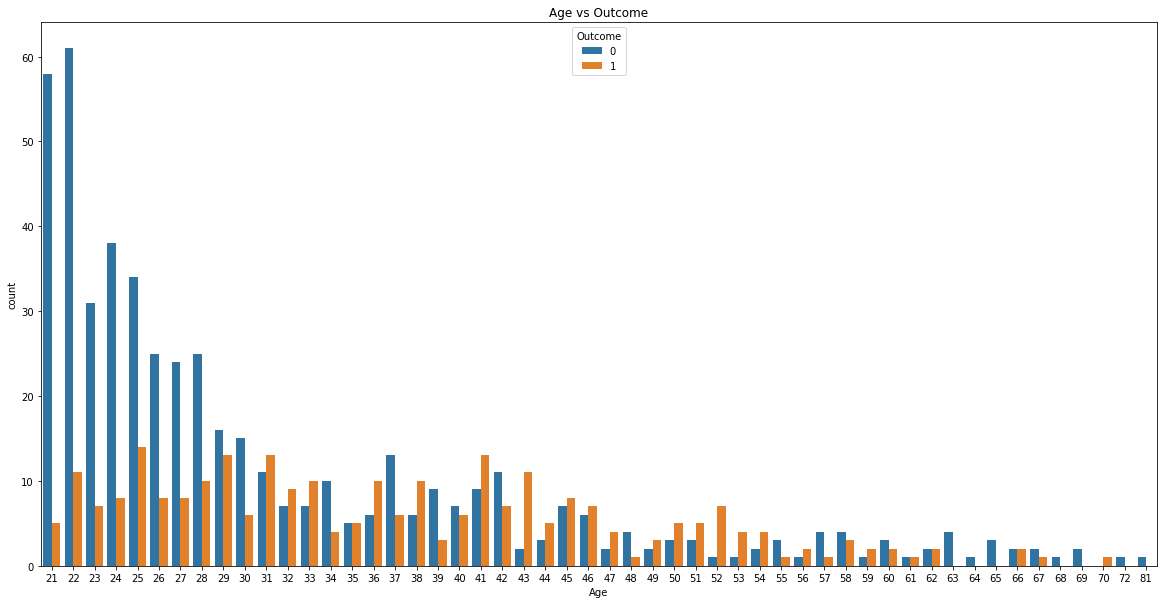

In [16]:
plt.figure(figsize=(20,10))
plt.title("Age vs Outcome")
sns.countplot(x='Age',hue='Outcome',data=df)
plt.show()

In [128]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


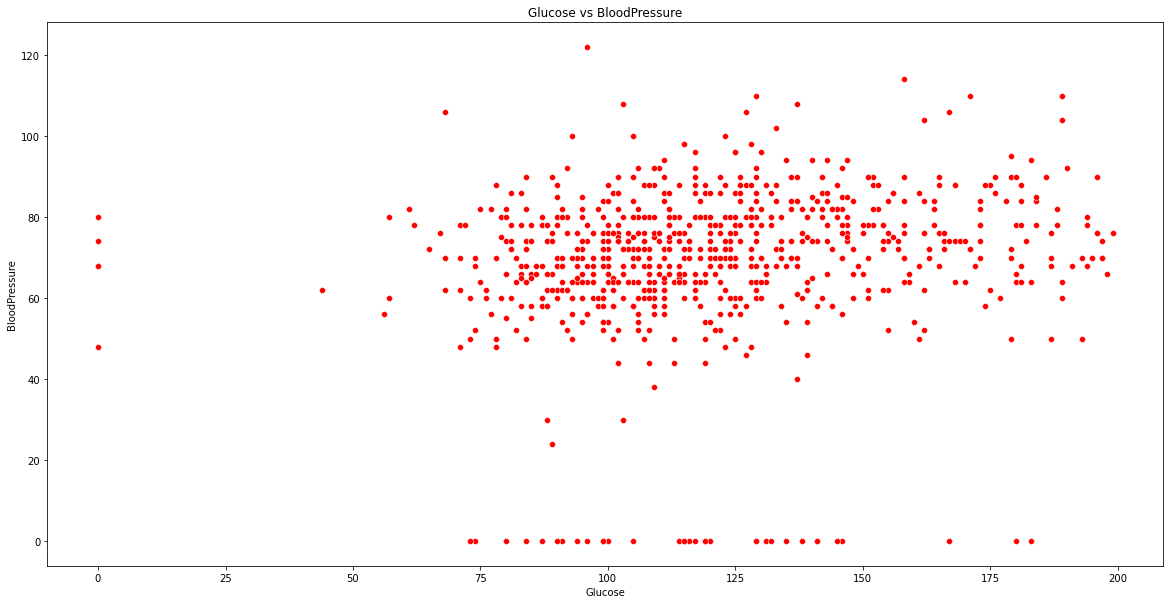

In [136]:
plt.figure(figsize=(20,10))
plt.title("Glucose vs BloodPressure")
sns.scatterplot(x='Glucose',y='BloodPressure',color=['red'],data=df);

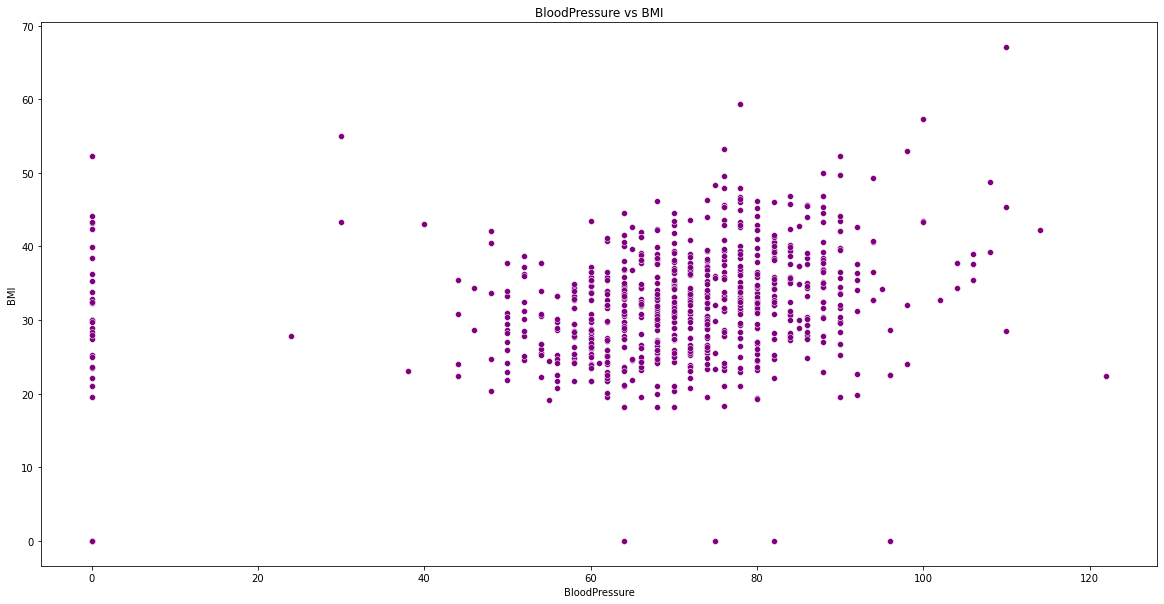

In [137]:
plt.figure(figsize=(20,10))
plt.title("BloodPressure vs BMI")
sns.scatterplot(x='BloodPressure',y='BMI',color=['purple'],data=df);

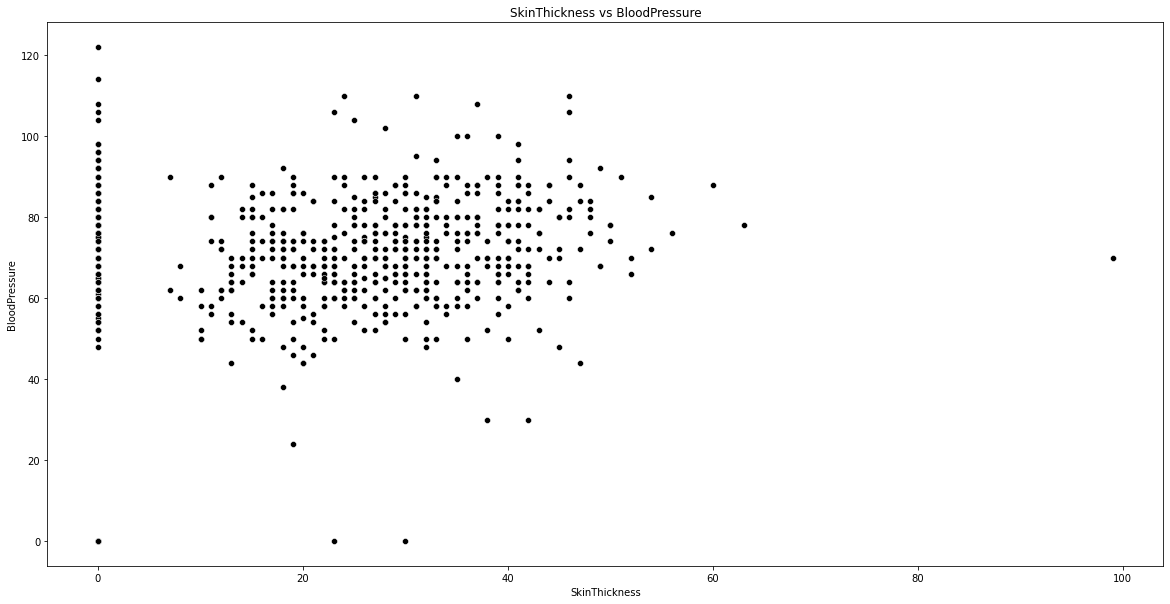

In [139]:
plt.figure(figsize=(20,10))
plt.title("SkinThickness vs BloodPressure")
sns.scatterplot(x='SkinThickness',y='BloodPressure',color=['black'],data=df);

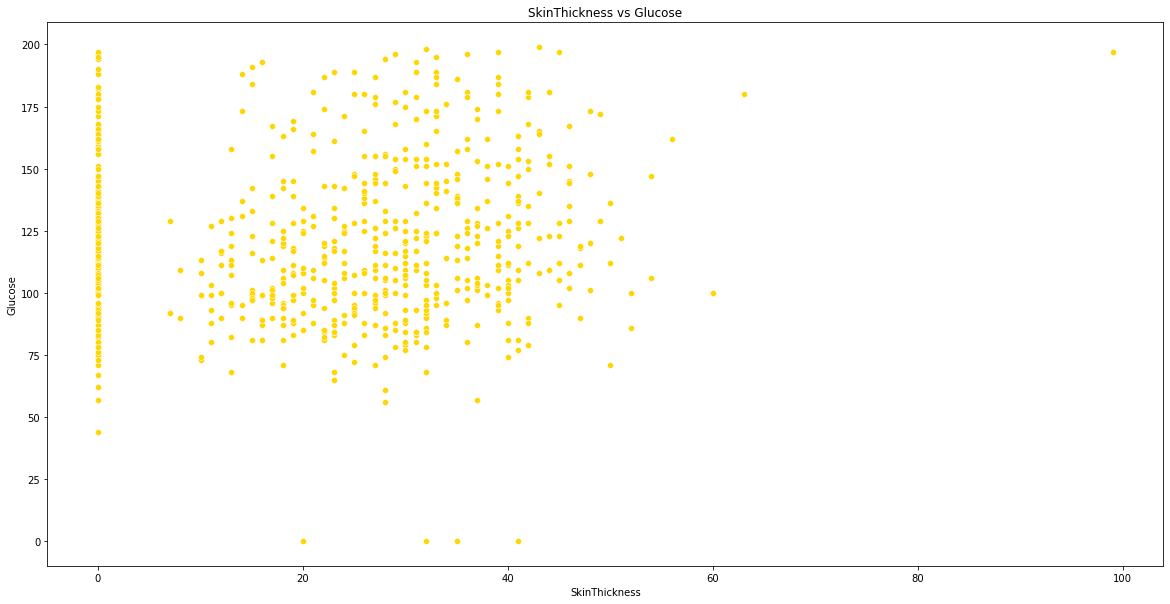

In [142]:
plt.figure(figsize=(20,10))
plt.title("SkinThickness vs Glucose")
sns.scatterplot(x='SkinThickness',y='Glucose',color=['gold'],data=df);

<AxesSubplot:>

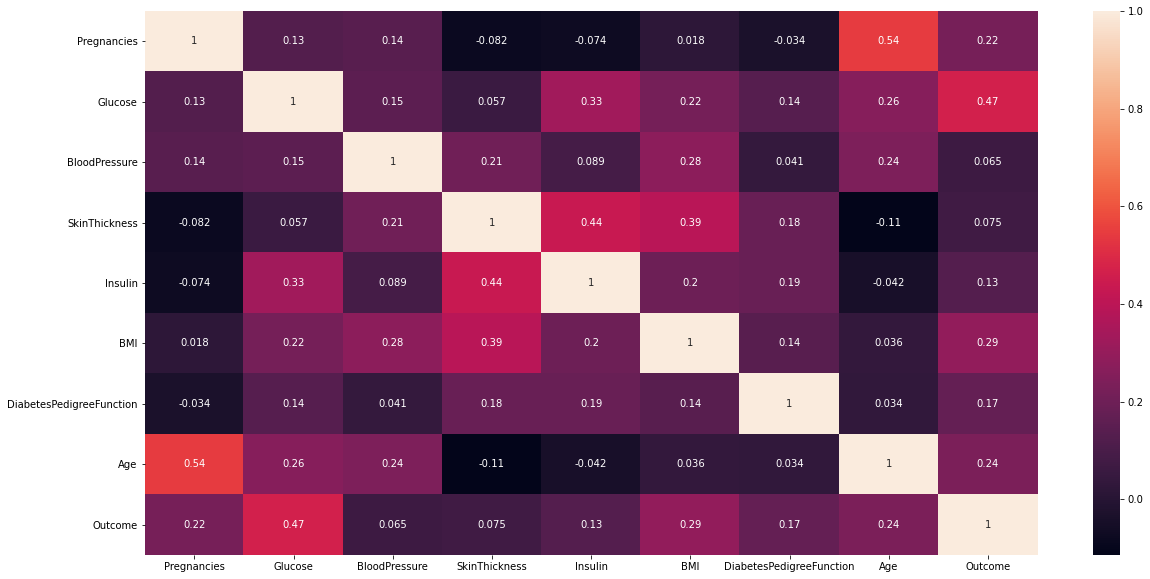

In [17]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

# Feature selection

In [18]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Segregate The data for training and testing

In [19]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']

In [20]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [21]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Splitting of X AND Y

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# Model Building

In [44]:
training_score1=[]
testing_score1=[]

In [45]:
def model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    y_pred_train=model.predict(x_train)
    a = accuracy_score(y_train,y_pred_train)*100
    b = accuracy_score(y_test,y_pred)*100
    a.astype(int)
    b.astype(int)
    training_score1.append(a)
    testing_score1.append(b)
    
    print(f"accuracy_Score of {model} model on Training Data is:",a)
    print(f"accuracy_Score of {model} model on Testing Data is:",b)


In [46]:
model(DecisionTreeClassifier())

accuracy_Score of DecisionTreeClassifier() model on Training Data is: 100.0
accuracy_Score of DecisionTreeClassifier() model on Testing Data is: 75.32467532467533


In [47]:
model(AdaBoostClassifier())

accuracy_Score of AdaBoostClassifier() model on Training Data is: 81.75895765472313
accuracy_Score of AdaBoostClassifier() model on Testing Data is: 72.07792207792207


In [48]:
model(GradientBoostingClassifier())

accuracy_Score of GradientBoostingClassifier() model on Training Data is: 92.50814332247556
accuracy_Score of GradientBoostingClassifier() model on Testing Data is: 73.37662337662337


In [49]:
model(XGBClassifier(verbose=False))

[08:10:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "verbose" } are not used.

accuracy_Score of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) model on Training Data is: 100.0


In [50]:
model(RandomForestClassifier())

accuracy_Score of RandomForestClassifier() model on Training Data is: 100.0
accuracy_Score of RandomForestClassifier() model on Testing Data is: 75.32467532467533


In [51]:
model(CatBoostClassifier(verbose=False))

accuracy_Score of <catboost.core.CatBoostClassifier object at 0x0000025CFE141C70> model on Training Data is: 95.27687296416939
accuracy_Score of <catboost.core.CatBoostClassifier object at 0x0000025CFE141C70> model on Testing Data is: 77.27272727272727


In [52]:
model(LGBMClassifier())

accuracy_Score of LGBMClassifier() model on Training Data is: 100.0
accuracy_Score of LGBMClassifier() model on Testing Data is: 72.07792207792207


In [53]:
model(KNeighborsClassifier())

accuracy_Score of KNeighborsClassifier() model on Training Data is: 79.31596091205212
accuracy_Score of KNeighborsClassifier() model on Testing Data is: 72.72727272727273


In [54]:
training_score1

[100.0,
 81.75895765472313,
 92.50814332247556,
 100.0,
 100.0,
 95.27687296416939,
 100.0,
 79.31596091205212]

In [55]:
testing_score1

[75.32467532467533,
 72.07792207792207,
 73.37662337662337,
 72.72727272727273,
 75.32467532467533,
 77.27272727272727,
 72.07792207792207,
 72.72727272727273]

In [56]:
algorithms=['Decision Tree','AdaBoost','Gradient Boosting','Xtreme Gradient Boosting','Random Forest','Cat Boost','LGBM','Kneighbors']

In [57]:
df=pd.DataFrame({'Algorithm':algorithms,'Training Score':training_score1,'Testing Score':testing_score1})

In [58]:
df

,Algorithm,Training Score,Testing Score
0,Decision Tree,100.000000,75.324675
1,AdaBoost,81.758958,72.077922
2,Gradient Boosting,92.508143,73.376623
3,Xtreme Gradient Boosting,100.000000,72.727273
4,Random Forest,100.000000,75.324675
5,Cat Boost,95.276873,77.272727
6,LGBM,100.000000,72.077922
7,Kneighbors,79.315961,72.727273


In [59]:
ct= CatBoostClassifier()

In [60]:
ct.fit(x_train,y_train)

Learning rate set to 0.008365
0:	learn: 0.6887815	total: 6.19ms	remaining: 6.18s
1:	learn: 0.6843795	total: 10.9ms	remaining: 5.46s
2:	learn: 0.6803402	total: 15.8ms	remaining: 5.26s
3:	learn: 0.6763657	total: 20.8ms	remaining: 5.17s
4:	learn: 0.6729920	total: 26.9ms	remaining: 5.34s
5:	learn: 0.6682936	total: 31.8ms	remaining: 5.27s
6:	learn: 0.6637529	total: 37.5ms	remaining: 5.32s
7:	learn: 0.6602752	total: 43.2ms	remaining: 5.35s
8:	learn: 0.6560932	total: 48.2ms	remaining: 5.3s
9:	learn: 0.6526467	total: 51.8ms	remaining: 5.13s
10:	learn: 0.6480687	total: 57.3ms	remaining: 5.15s
11:	learn: 0.6446279	total: 62.6ms	remaining: 5.15s
12:	learn: 0.6419490	total: 67.3ms	remaining: 5.11s
13:	learn: 0.6376676	total: 72.5ms	remaining: 5.11s
14:	learn: 0.6341955	total: 77.7ms	remaining: 5.1s
15:	learn: 0.6310324	total: 82.7ms	remaining: 5.09s
16:	learn: 0.6285373	total: 87.2ms	remaining: 5.04s
17:	learn: 0.6252972	total: 92.1ms	remaining: 5.03s
18:	learn: 0.6212094	total: 97.2ms	remaining: 

171:	learn: 0.4160503	total: 875ms	remaining: 4.21s
172:	learn: 0.4155841	total: 882ms	remaining: 4.21s
173:	learn: 0.4151447	total: 887ms	remaining: 4.21s
174:	learn: 0.4144322	total: 892ms	remaining: 4.2s
175:	learn: 0.4137904	total: 897ms	remaining: 4.2s
176:	learn: 0.4131818	total: 902ms	remaining: 4.19s
177:	learn: 0.4125252	total: 907ms	remaining: 4.19s
178:	learn: 0.4119809	total: 911ms	remaining: 4.18s
179:	learn: 0.4112578	total: 916ms	remaining: 4.17s
180:	learn: 0.4108579	total: 922ms	remaining: 4.17s
181:	learn: 0.4104519	total: 928ms	remaining: 4.17s
182:	learn: 0.4099672	total: 932ms	remaining: 4.16s
183:	learn: 0.4092940	total: 938ms	remaining: 4.16s
184:	learn: 0.4085842	total: 943ms	remaining: 4.15s
185:	learn: 0.4079905	total: 948ms	remaining: 4.15s
186:	learn: 0.4072261	total: 953ms	remaining: 4.14s
187:	learn: 0.4062848	total: 958ms	remaining: 4.14s
188:	learn: 0.4053986	total: 963ms	remaining: 4.13s
189:	learn: 0.4050643	total: 968ms	remaining: 4.13s
190:	learn: 0.

336:	learn: 0.3498447	total: 1.75s	remaining: 3.45s
337:	learn: 0.3495649	total: 1.76s	remaining: 3.45s
338:	learn: 0.3491021	total: 1.76s	remaining: 3.44s
339:	learn: 0.3488155	total: 1.77s	remaining: 3.44s
340:	learn: 0.3482094	total: 1.78s	remaining: 3.43s
341:	learn: 0.3477379	total: 1.78s	remaining: 3.43s
342:	learn: 0.3474395	total: 1.79s	remaining: 3.42s
343:	learn: 0.3473146	total: 1.79s	remaining: 3.42s
344:	learn: 0.3471486	total: 1.8s	remaining: 3.41s
345:	learn: 0.3469546	total: 1.8s	remaining: 3.4s
346:	learn: 0.3465410	total: 1.81s	remaining: 3.4s
347:	learn: 0.3460461	total: 1.81s	remaining: 3.39s
348:	learn: 0.3458387	total: 1.82s	remaining: 3.39s
349:	learn: 0.3455333	total: 1.82s	remaining: 3.38s
350:	learn: 0.3453183	total: 1.83s	remaining: 3.38s
351:	learn: 0.3450367	total: 1.83s	remaining: 3.37s
352:	learn: 0.3448841	total: 1.83s	remaining: 3.36s
353:	learn: 0.3446238	total: 1.84s	remaining: 3.36s
354:	learn: 0.3442908	total: 1.84s	remaining: 3.35s
355:	learn: 0.34

519:	learn: 0.3046879	total: 2.65s	remaining: 2.44s
520:	learn: 0.3044685	total: 2.65s	remaining: 2.44s
521:	learn: 0.3043875	total: 2.66s	remaining: 2.44s
522:	learn: 0.3041659	total: 2.67s	remaining: 2.43s
523:	learn: 0.3039940	total: 2.67s	remaining: 2.42s
524:	learn: 0.3037753	total: 2.67s	remaining: 2.42s
525:	learn: 0.3035351	total: 2.68s	remaining: 2.42s
526:	learn: 0.3032098	total: 2.68s	remaining: 2.41s
527:	learn: 0.3028300	total: 2.69s	remaining: 2.4s
528:	learn: 0.3026813	total: 2.69s	remaining: 2.4s
529:	learn: 0.3024546	total: 2.7s	remaining: 2.39s
530:	learn: 0.3021195	total: 2.7s	remaining: 2.39s
531:	learn: 0.3018969	total: 2.71s	remaining: 2.38s
532:	learn: 0.3017170	total: 2.71s	remaining: 2.38s
533:	learn: 0.3015846	total: 2.72s	remaining: 2.37s
534:	learn: 0.3013075	total: 2.72s	remaining: 2.37s
535:	learn: 0.3011562	total: 2.73s	remaining: 2.36s
536:	learn: 0.3009437	total: 2.73s	remaining: 2.35s
537:	learn: 0.3007764	total: 2.73s	remaining: 2.35s
538:	learn: 0.30

712:	learn: 0.2662788	total: 3.7s	remaining: 1.49s
713:	learn: 0.2661646	total: 3.7s	remaining: 1.48s
714:	learn: 0.2659229	total: 3.71s	remaining: 1.48s
715:	learn: 0.2656977	total: 3.71s	remaining: 1.47s
716:	learn: 0.2655598	total: 3.72s	remaining: 1.47s
717:	learn: 0.2653551	total: 3.72s	remaining: 1.46s
718:	learn: 0.2652509	total: 3.73s	remaining: 1.46s
719:	learn: 0.2651413	total: 3.73s	remaining: 1.45s
720:	learn: 0.2650117	total: 3.74s	remaining: 1.45s
721:	learn: 0.2647575	total: 3.74s	remaining: 1.44s
722:	learn: 0.2645131	total: 3.75s	remaining: 1.44s
723:	learn: 0.2644559	total: 3.75s	remaining: 1.43s
724:	learn: 0.2642622	total: 3.76s	remaining: 1.43s
725:	learn: 0.2641285	total: 3.76s	remaining: 1.42s
726:	learn: 0.2639978	total: 3.77s	remaining: 1.42s
727:	learn: 0.2638980	total: 3.77s	remaining: 1.41s
728:	learn: 0.2637390	total: 3.78s	remaining: 1.41s
729:	learn: 0.2635996	total: 3.78s	remaining: 1.4s
730:	learn: 0.2634984	total: 3.79s	remaining: 1.39s
731:	learn: 0.2

887:	learn: 0.2355683	total: 4.59s	remaining: 578ms
888:	learn: 0.2353364	total: 4.59s	remaining: 573ms
889:	learn: 0.2352577	total: 4.6s	remaining: 568ms
890:	learn: 0.2350677	total: 4.6s	remaining: 563ms
891:	learn: 0.2349288	total: 4.61s	remaining: 558ms
892:	learn: 0.2347657	total: 4.61s	remaining: 553ms
893:	learn: 0.2345968	total: 4.62s	remaining: 548ms
894:	learn: 0.2345155	total: 4.62s	remaining: 542ms
895:	learn: 0.2343595	total: 4.63s	remaining: 537ms
896:	learn: 0.2340755	total: 4.64s	remaining: 532ms
897:	learn: 0.2340524	total: 4.64s	remaining: 527ms
898:	learn: 0.2338391	total: 4.65s	remaining: 522ms
899:	learn: 0.2336188	total: 4.65s	remaining: 517ms
900:	learn: 0.2335432	total: 4.66s	remaining: 512ms
901:	learn: 0.2333742	total: 4.66s	remaining: 506ms
902:	learn: 0.2332347	total: 4.67s	remaining: 501ms
903:	learn: 0.2330512	total: 4.67s	remaining: 496ms
904:	learn: 0.2329395	total: 4.68s	remaining: 491ms
905:	learn: 0.2329084	total: 4.68s	remaining: 486ms
906:	learn: 0.

In [61]:
y_pred=ct.predict(x_test)

In [62]:
y_pred_train= ct.predict(x_train)

In [63]:
accuracy_score(y_pred,y_test)

0.7727272727272727

In [64]:
accuracy_score(y_pred_train,y_train)

0.9527687296416938

# checking Feature Importance 

In [76]:
Importances= pd.DataFrame({'Features':x_train.columns,'importance':ct.feature_importances_})

In [77]:
Importances

,Features,importance
0,Pregnancies,9.676423
1,Glucose,24.139014
2,BloodPressure,8.265402
3,SkinThickness,7.465360
4,Insulin,7.525542
5,BMI,17.968438
6,DiabetesPedigreeFunction,13.029564
7,Age,11.930257


In [78]:
Importance=Importances.sort_values(by='importance',ascending=False)

In [79]:
Importance

,Features,importance
1,Glucose,24.139014
5,BMI,17.968438
6,DiabetesPedigreeFunction,13.029564
7,Age,11.930257
0,Pregnancies,9.676423
2,BloodPressure,8.265402
4,Insulin,7.525542
3,SkinThickness,7.465360


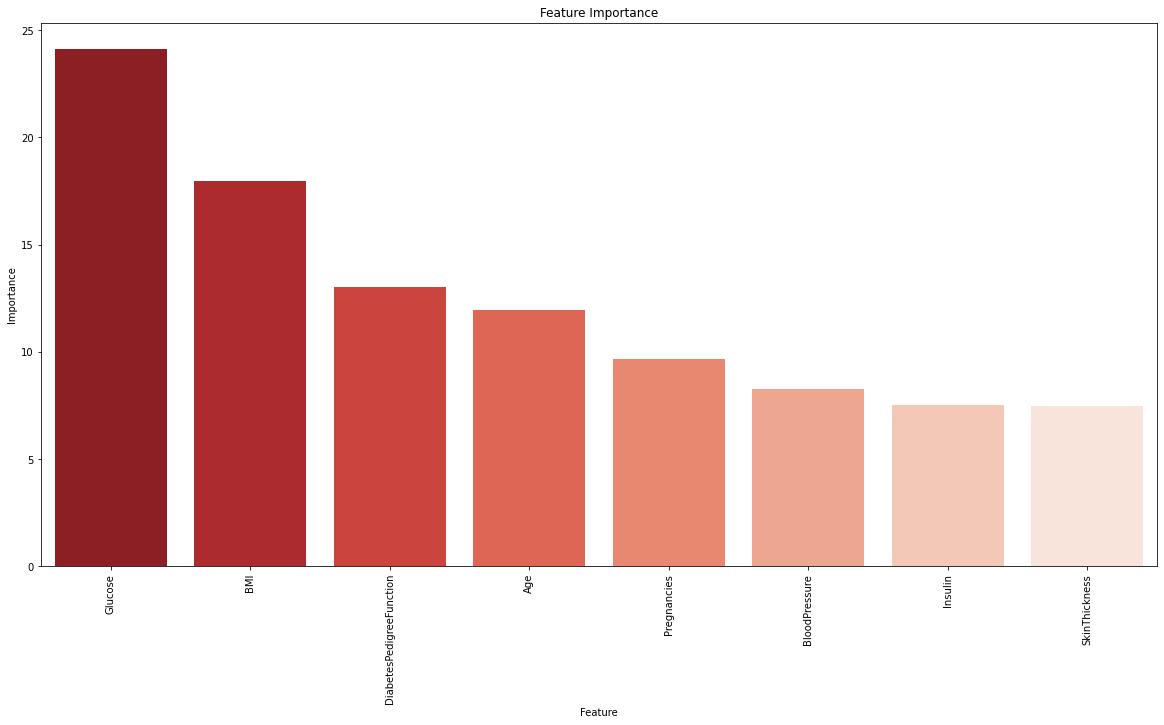

In [86]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Features',y='importance',palette='Reds_r',data=Importance)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90);

# HyperParameter tunning CatBoostClassifier()

In [88]:
CBR=CatBoostClassifier()

In [89]:
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }

In [90]:
grid = GridSearchCV(estimator=CBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid.fit(x_train, y_train)

0:	learn: 0.6679608	total: 1.79ms	remaining: 51.9ms
1:	learn: 0.6454865	total: 3.66ms	remaining: 51.3ms
2:	learn: 0.6264925	total: 5.1ms	remaining: 45.9ms
3:	learn: 0.6086689	total: 6.44ms	remaining: 41.9ms
4:	learn: 0.5930251	total: 8.03ms	remaining: 40.2ms
5:	learn: 0.5804536	total: 9.95ms	remaining: 39.8ms
6:	learn: 0.5679415	total: 11.3ms	remaining: 37.1ms
7:	learn: 0.5563525	total: 12.6ms	remaining: 34.7ms
8:	learn: 0.5459481	total: 14.1ms	remaining: 32.9ms
9:	learn: 0.5368903	total: 15.5ms	remaining: 31ms
10:	learn: 0.5274615	total: 17.1ms	remaining: 29.5ms
11:	learn: 0.5192071	total: 18.6ms	remaining: 28ms
12:	learn: 0.5112316	total: 20.1ms	remaining: 26.3ms
13:	learn: 0.5035394	total: 21.4ms	remaining: 24.4ms
14:	learn: 0.4967935	total: 22.9ms	remaining: 22.9ms
15:	learn: 0.4914685	total: 24.2ms	remaining: 21.2ms
16:	learn: 0.4854118	total: 25.6ms	remaining: 19.6ms
17:	learn: 0.4804241	total: 27.4ms	remaining: 18.2ms
18:	learn: 0.4757530	total: 28.9ms	remaining: 16.7ms
19:	lear

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000025C8169C790>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [91]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n", grid.best_estimator_)
print("\n The best score across ALL searched params:\n", grid.best_score_)
print("\n The best parameters across ALL searched params:\n", grid.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.762214983713355

 The best parameters across ALL searched params:
 {'depth': 6, 'iterations': 30, 'learning_rate': 0.1}


# Hyperparameter Tunning for DecisionTreeClassifier()

In [93]:
dt=DecisionTreeClassifier()

In [94]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [95]:
y_pred=dt.predict(x_test)

In [96]:
y_pred_train=dt.predict(x_train)

In [97]:
accuracy_score(y_pred,y_test)

0.7597402597402597

In [98]:
accuracy_score(y_pred_train,y_train)

1.0

# Checking Feature Importance

In [99]:
Importances= pd.DataFrame({'Features':x_train.columns,'importance':dt.feature_importances_})

In [100]:
Importance=Importances.sort_values(by='importance',ascending=False)

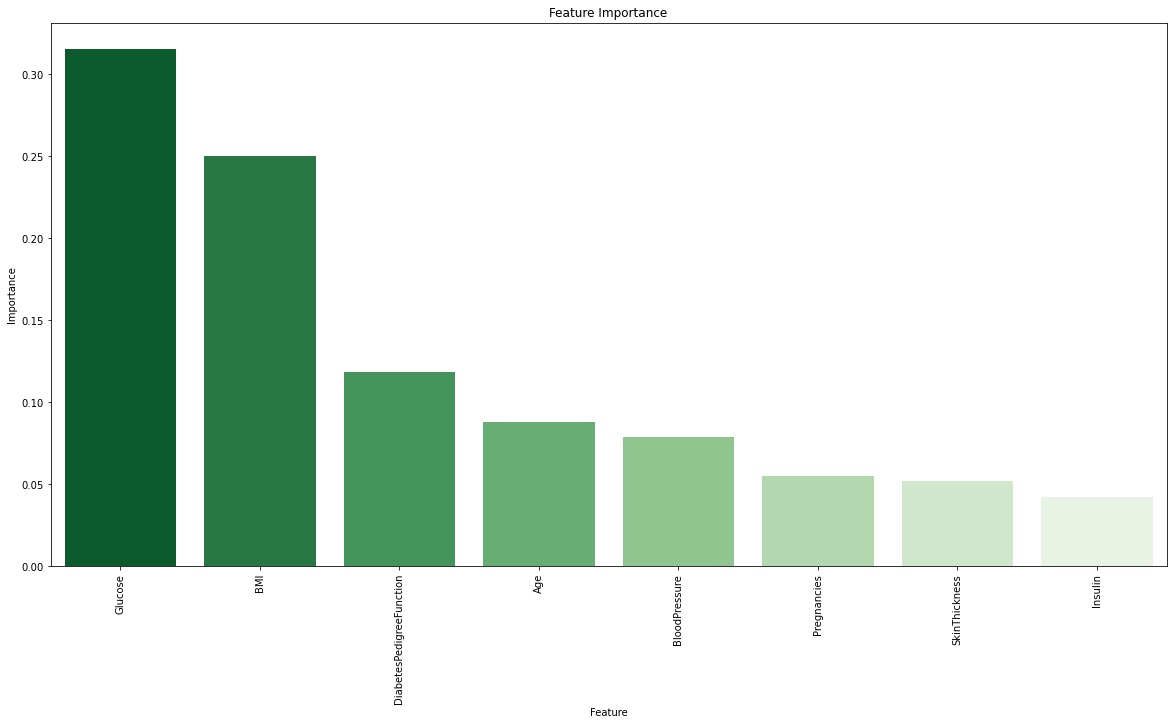

In [101]:
plt.figure(figsize=(20, 10))
sns.barplot(x='Features',y='importance',palette='Greens_r',data=Importance)
plt.title('Feature Importance')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90);

# Hyperparameter tunning for Decisison Tree Classifier

In [102]:
grid_param ={
 'criterion':['gini','entropy'],
 'max_depth': range(2,32,1),
 'min_samples_leaf': range(1,10,1),
 'min_samples_split': range(2,10,1),
 'splitter':['best','random']
}


In [103]:
grid_search= GridSearchCV(estimator=dt,
 param_grid= grid_param,
 cv=5,
n_jobs=-1)

In [104]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [105]:
best_parameters= grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 26, 'min_samples_leaf': 8, 'min_samples_split': 9, 'splitter': 'random'}


In [106]:
grid_search.best_score_

0.7638677862188459

# Checking Prediction Of Model

In [147]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [146]:
dt.predict([[0,137,40,35,168,43.1,2.228,33]]) # 4th patient

array([1], dtype=int64)

In [148]:
dt.predict([[5,121,72,23,112,26.2,0.245,30]]) # 765 patient

array([0], dtype=int64)